# Kaggle 신용카드 부정결제 검출 (Google Drive Mount)
https://www.kaggle.com/mlg-ulb/creditcardfraud
## Credit Card Fraud Detection
* creditcard.csv (284,807 * 31)
* Class : '0' (정상결제), '1' (부정결제)
* 부정 검출(Fraud Detection), 이상 탐지(Anomaly Detection)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# I. Google Drive Mount
* 'creditCardFraud.zip' 파일을 구글드라이브에 업로드 후 진행

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


* 마운트 결과 확인

In [3]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'

-rw------- 1 root root 69155672 Mar 31 15:04 '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'


# II. Data Preprocessing

> ## 1) Unzip 'creditCardFraud.zip'

* Colab 파일시스템에 'creditcard.csv' 파일 생성

In [4]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/creditCardFraud.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip
  inflating: creditcard.csv          


* creditcard.csv 파일 확인

In [5]:
!ls -l

total 147304
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
drwx------ 5 root root      4096 Sep 23 07:45 drive
drwxr-xr-x 1 root root      4096 Sep 16 13:40 sample_data


> ## 2) 데이터 읽어오기

* pandas DataFrame

In [6]:
%%time

import pandas as pd

DF = pd.read_csv('creditcard.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* '0' (정상) Class와 '1' (부정) Class 개수

In [8]:
DF.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

* '0' (정상) Class와 '1' (부정) Class 비율

In [9]:
(DF.Class.value_counts() / DF.shape[0]) * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

> ## 3) Time 열(Column) 삭제

In [10]:
DF.drop('Time', axis = 1, inplace = True)

DF.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.5516,-0.617801,-0.99139,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


> ## 4) train_test_split

* X (Input), y (Output) 지정

In [11]:
X = DF.iloc[:,:-1]
y = DF.iloc[:, -1]

X.shape, y.shape

((284807, 29), (284807,))

> ### (1) Without 'stratify'

In [12]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 29), (199364,), (85443, 29), (85443,))

* Train_Data와 Test_Data의 1 (부정) 비율이 불균형

In [13]:
print('Train_Data :','\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data :','\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train_Data : 
 0    99.825445
1     0.174555
Name: Class, dtype: float64
Test_Data : 
 0    99.831467
1     0.168533
Name: Class, dtype: float64


> ### (2) With 'Stratify'

In [14]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 29), (199364,), (85443, 29), (85443,))

* Train_Data와 Test_Data의 1 (부정) 비율이 균형

In [15]:
print('Train_Data :','\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data :','\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train_Data : 
 0    99.827451
1     0.172549
Name: Class, dtype: float64
Test_Data : 
 0    99.826785
1     0.173215
Name: Class, dtype: float64


## III. Modeling

### 1)Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
Model_dt = DecisionTreeClassifier(random_state = 2045)
Model_dt.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2045, splitter='best')

In [20]:
from sklearn.tree import export_graphviz
import graphviz

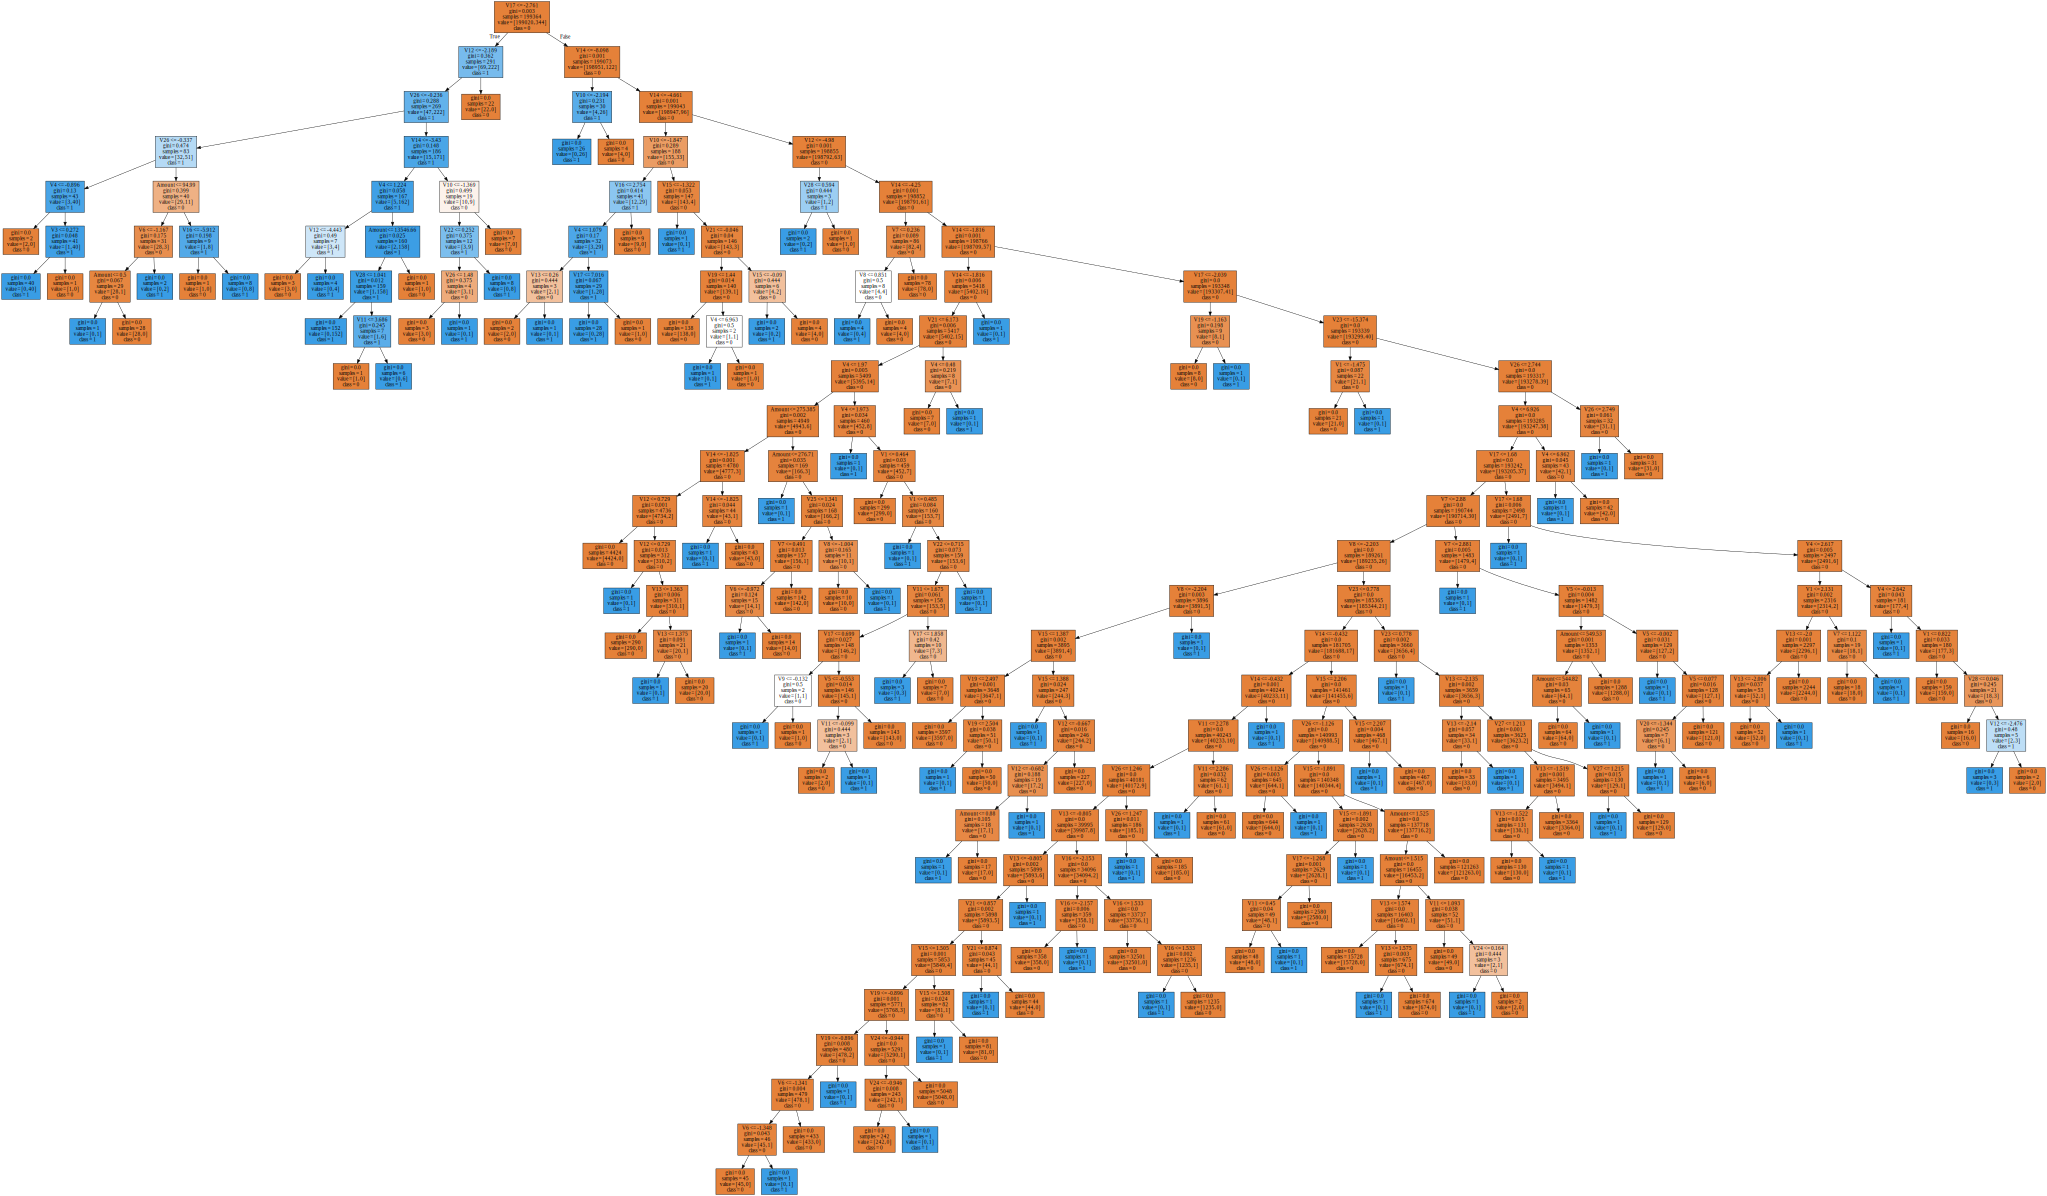

In [43]:
graphviz.Source(export_graphviz(Model_dt,
                                class_names = (['0', '1']),
                                feature_names = (['V1', 'V2', 'V3', 'V4','V5', 'V6', 'V7', 'V8','V9', 'V10', 'V11', 'V12','V13', 'V14', 'V15', 'V16','V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24','V25', 'V26', 'V27', 'V28','Amount']),
                                filled = True))

엄청 복잡!

In [44]:
y_hat = Model_dt.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_hat)


array([[85263,    32],
       [   28,   120]])

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, average = None))
print(recall_score(y_test, y_hat, average = None))


0.9992977774656788
[0.99967171 0.78947368]
[0.99962483 0.81081081]


- 진짜 문제있는 상황중에(28+120) 문제있는 케이스(120) = 81%의 확률 이 중요
- 실제 필터링은 32+120 

In [48]:
Model_dt.feature_importances_


array([7.29199497e-03, 0.00000000e+00, 2.84097694e-03, 2.49045515e-02,
       4.26319150e-03, 1.07027868e-02, 1.11429056e-02, 1.13917669e-02,
       1.45600068e-03, 6.05171956e-02, 1.33539551e-02, 5.86451146e-02,
       1.94057763e-02, 1.03934964e-01, 1.83386321e-02, 2.52116024e-02,
       5.05319990e-01, 0.00000000e+00, 9.84893919e-03, 2.49600117e-03,
       5.03881243e-03, 7.08144206e-03, 3.04804401e-03, 4.85278524e-03,
       2.13941810e-04, 5.23613016e-02, 2.90962131e-03, 6.33262184e-03,
       2.70950849e-02])

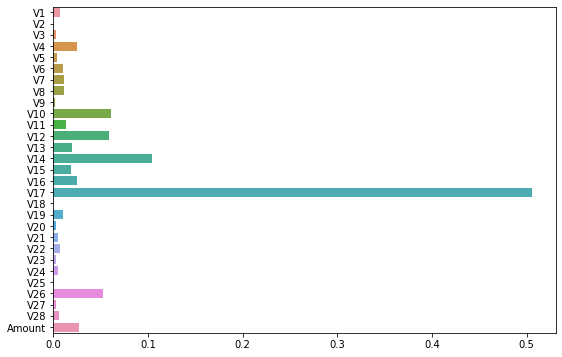

In [49]:
plt.figure(figsize = (9, 6))
sns.barplot(Model_dt.feature_importances_,
            ['V1', 'V2', 'V3', 'V4','V5', 'V6', 'V7', 'V8','V9', 'V10', 'V11', 'V12','V13', 'V14', 'V15', 'V16','V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24','V25', 'V26', 'V27', 'V28','Amount'])
plt.show()

### 2)Pruning

In [27]:
from sklearn.tree import DecisionTreeClassifier
Model_pr = DecisionTreeClassifier(max_depth = 5,
                                  random_state = 2045)
Model_pr.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2045, splitter='best')

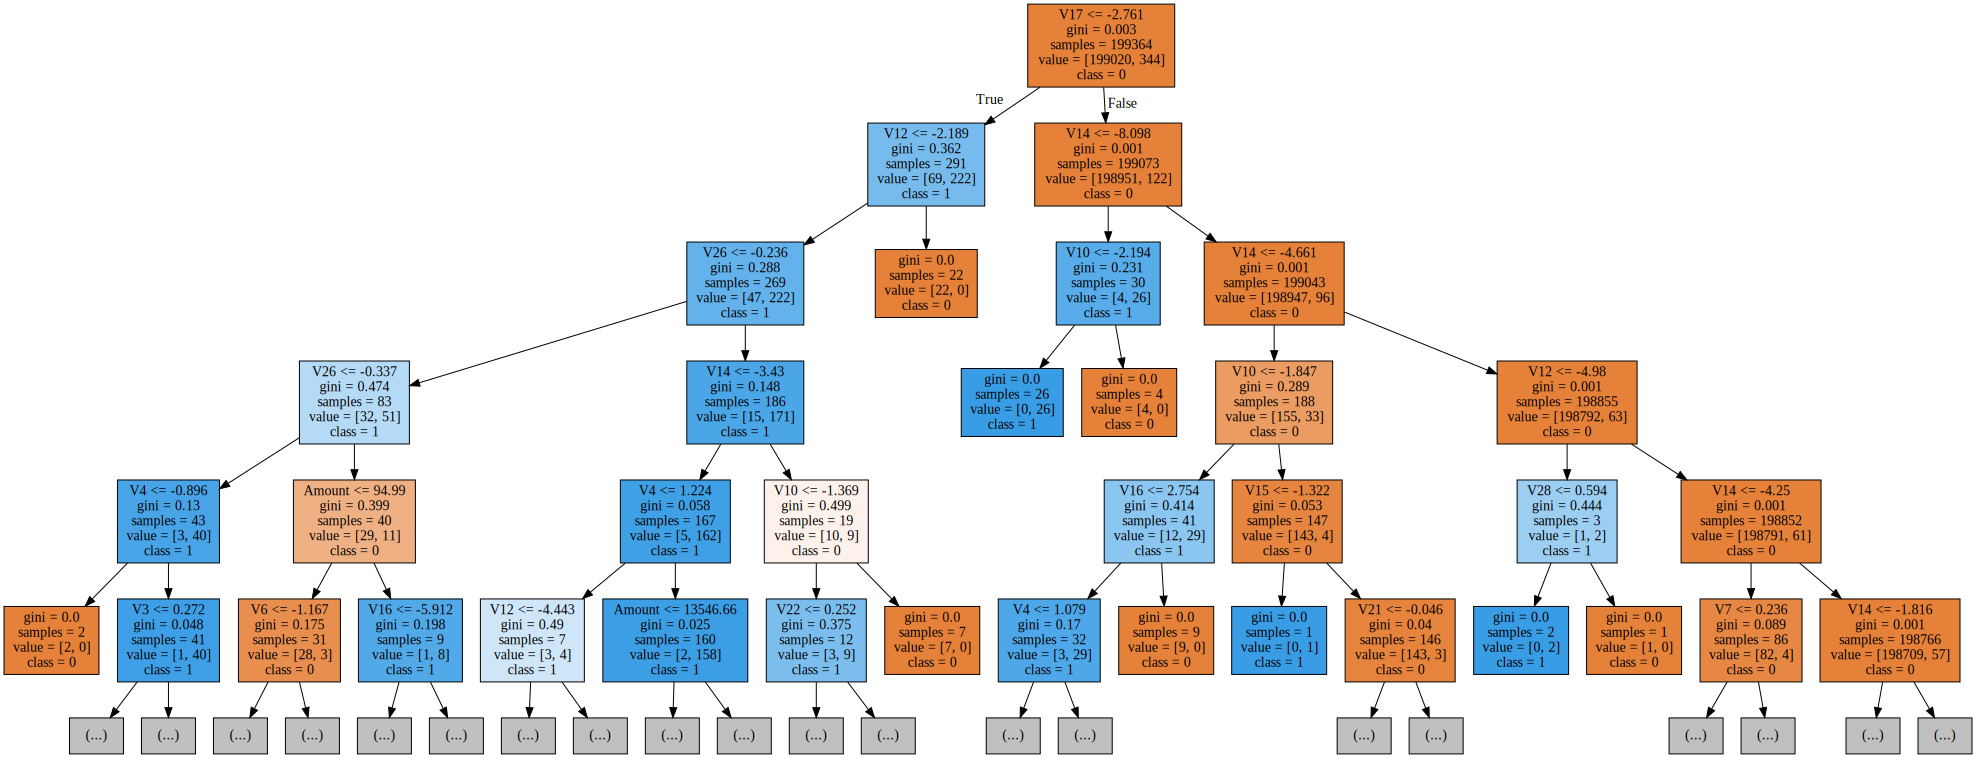

In [32]:
graphviz.Source(export_graphviz(Model_dt,
                                class_names = (['0', '1']),
                                feature_names = (['V1', 'V2', 'V3', 'V4','V5', 'V6', 'V7', 'V8','V9', 'V10', 'V11', 'V12','V13', 'V14', 'V15', 'V16','V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24','V25', 'V26', 'V27', 'V28','Amount']),
                                max_depth = 5,
                                filled = True))

In [34]:
y_hat_P5 = Model_pr.predict(X_test)

In [35]:
print(confusion_matrix(y_test, y_hat_P5))

[[85280    15]
 [   25   123]]


In [36]:
print(accuracy_score(y_test, y_hat_P5))
print(precision_score(y_test, y_hat_P5, average = None))
print(recall_score(y_test, y_hat_P5, average = None))

0.9995318516437859
[0.99970693 0.89130435]
[0.99982414 0.83108108]


In [40]:
Model_pr.feature_importances_



array([0.        , 0.        , 0.        , 0.01116995, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.06498814,
       0.        , 0.05698565, 0.        , 0.12257226, 0.00357606,
       0.0216525 , 0.63370038, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00250214, 0.        , 0.        ,
       0.05341607, 0.01301114, 0.        , 0.0164257 ])

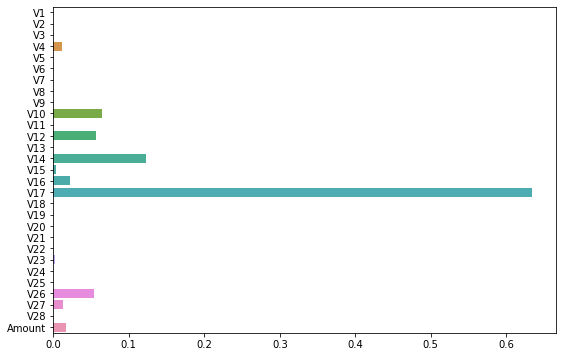

In [41]:
plt.figure(figsize = (9, 6))
sns.barplot(Model_pr.feature_importances_,
            ['V1', 'V2', 'V3', 'V4','V5', 'V6', 'V7', 'V8','V9', 'V10', 'V11', 'V12','V13', 'V14', 'V15', 'V16','V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24','V25', 'V26', 'V27', 'V28','Amount'])
plt.show()


- 가지치기 했는데 테스트를 해보면 좋게나옴
- 사용된 변수 x가 적게사용

# 
# 
# 
# The End
# 
# 
# 